<br>

# 🌳 **의사결정나무 (결정트리, Decision Tree)** 

결정트리는 분류와 회귀가 모두 가능한 지도학습 모델 중 하나이다. 스무고개 하듯이 예/아니오 질문을 이어가며 학습한다.   
결정트리가 중요한 이유는 결정트리를 여러 개를 (몇 천개 이상) 연결시키는 앙상블 기법, 랜덤포레스트의 기반이 되기 때문이다.  

결정트리는 공식이 매우 간단하며 결과를 해석하고 이해하기 쉽다. 또한 선형데이터일 때 가정 적합한 모델이다. 비선형데이터에는 적합하지 않지만 트리 여러 개를 사용하는 랜덤포레스트를 수행하여 비선형데이터의 학습도 진행할 수 있다. 예측도 가능하지만 분류가 주력이다.  

또한 결정트리는 데이터의 스케일에 구애받지 않는다. 각 특성이 개별적으로 처리되어 분할하기 때문이다. 따라서 정규화나 표준화와 같은 전처리 과정이 필요 없고 유의수준 판단 기준이 없으며 선형성, 등분산성 등의 판단 또한 필요하지 않다.    


<br>

ex) 동물 분류하기  
가장 비중이 있는 것, 즉 가장 큰 단위로 분류될 수 있는 것부터 질문을 한다. (ex 날개가 있는가)  yes / no -> 이 질문은 결정트리가 스스로 판단하여 결정한다.   

맨 처음 분류기준(첫 질문)을 Root Node라고 하며 맨 마지막 노드(끝마디)를 Terminal Node 혹은 Leaf Node라고 한다. 터미널 노드를 모두 합치면 전체 개수가 나온다.  





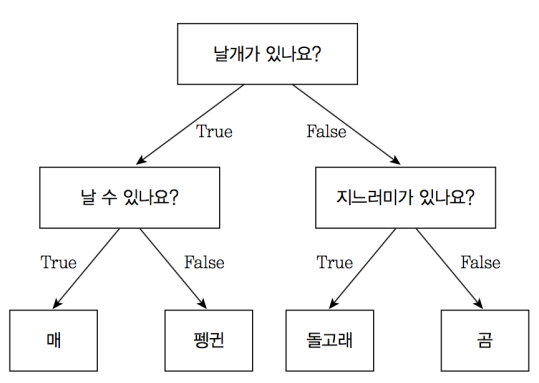

이미지출처 : https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-5-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC/


스무고개게임 : 아키네이터 https://kr.akinator.com/  




<br>

## **엔트로피 (Entropy, 불확실성)**

불순도(Impurity)란 한 범주(분류) 안에 서로 다른 종류의 데이터가 얼마나 섞여 있는 지를 의미한다. 엔트로피는 그러한 불순도를 수치적으로 나타낸 척도로, 엔트로피가 높다는 것은 불순도가 높다는 뜻이다.  엔트로피가 높을 수록 그 범주의 특징을 찾는 것이 어렵다고 할 수 있다. 

<br>

엔트로피(Entropy) 수치의 의미
> + 0일 경우 : 불순도가 0. 해당 범주에 속하는 개체의 속성이 모두 동일함. 즉, 분류를 더 이상 하지 않아도 된다.
+ 1에 가까울 경우 : 불순도가 최대인 상태. 한 범주 안에 서로 다른 데이터가 정확히 반반 존재한다.  
+ 0에 가까울 경우 : 불순도가 낮다.  


ex) 동전던지기를 한다고 생각해보자.  

일반적인 동전의 경우 50%:50% → 불확실성이 크다.   
앞면뒷면이 동일한 그림인 경우 100% → 불확실성이 없다.  
동전이 찌그러져서 한쪽면이 나올 확률이 높을 경우 70%:30% → 불확실성이 크지 않지만 존재한다.  

엔트로피(불순도)가 높다는 것은 아직 나눌 여지가 있다는 것이다. 결정트리는 이 불확실성(엔트로피)이 최소가 될 때 까지 나눈다.  






<br>

## **정보획득 (Information gain)**  


정보획득량은 분류 이전의 엔트로피와 분류 후 엔트로피의 차이로 엔트로피가 얼마나 감소하였는가를 나타내는 값이다. 정보를 획득함으로써 불확실성을 줄일 수 있다는 것이다. 
예를 들어 엔트로피가 1인 상태에서 분류 후 엔트로피가 0.7로 바뀌었다면 정보획득량은 0.3이다.  

> Information gain = entropy(parent) - [weighted average]entropy(children)
정보획득량 = 분기 전 엔트로피 - 분기 후 엔트로피의 가중평균  

분기 후에는 범주가 2개 이상으로 나뉘기 때문에 가중평균으로 엔트로피를 구한다.  

결정 트리의 알고리즘은 정보획득을 최대화하는 방향으로 학습이 진행된다. 그러므로 정보획득량의 값이 높을 수록 분류 성능이 좋은 모델이라고 할 수 있다.  





<br> 

## **가지치기 (Pruning)**

의사결정나무의는 분석 과정이 직관적이고 이해하기 쉽다는 장점이 있지만. 과적합에 취악하다는 단점이 있다. 과적합을 방지하기 위한 전략으로 결정트리에서는 가지치기 기법을 사용한다.  

가지치기란 말그대로 나무의 가지를 쳐내는 과정이다.  
트리에 가지가 너무 많다면 오버피팅이라 볼 수 있는데 파라미터 값을 조정하여 결정트리가 더 이상 가지를 뻗지 않도록 할 수 있다.  

<br>


`min_sample_split` : 노드를 분할하기 위한 최소한의 샘플데이터 수를 지정한다. 기본값은 2.   
예를 들어 `min_sample_split=10`이면 한 노드에 데이터가 10개 이하로 있다면 그 노드는 더 이상 분류를 하지 않는다. 값이 작게 설정될 수록 노드가 많아지므로 과적합 가능성이 커진다.  

`max_depth` : 트리의 최대 깊이를 지정한다. 기본값은 None으로 완벽하게 나누어질 때까지 계속 나눈다. 
`max_depth=4`이면 최대 깊이가 4인 것이다. 값이 커지면 즉, 트리의 깊이가 깊어지면 과적합이 될 가능성이 증가한다.  

가지치기 방법에는 사전가지치기와 사후가지치기가 있다. 사전가지치기는 파리미터 설정을 통해 나무가 다 자라기 전에 알고리즘을 멈추는 방법이고, 사후가지치기는 트리를 만든 후에 데이터가 적은 노드를 삭제하거나 병합하여 가지를 줄이는 방법이다.  
`sklearn`에서는 사전 가지치기만 지원한다.  


<br>

# 👉 Graphviz 설치하기  

결정트리의 3차원 공간을 2차원으로 표현할 수 있다. 2차원의 모양으로 분류모델을 표현하면 가독성이 좋기 때문에 2차원 형식 많이 사용한다.  
의사결정나무 시각화에 필요한 Graphviz 라이브러리를 설치해보자. 


참고: https://cafe.daum.net/flowlife/RUrO/86  






<br>


## 1. 파일 다운로드 

파일 다운 경로 : https://graphviz.org/download/  


윈도우 64bit (운영체제에 맞는 것으)로 다운받고 실행. 기본값으로 설치 진행.   



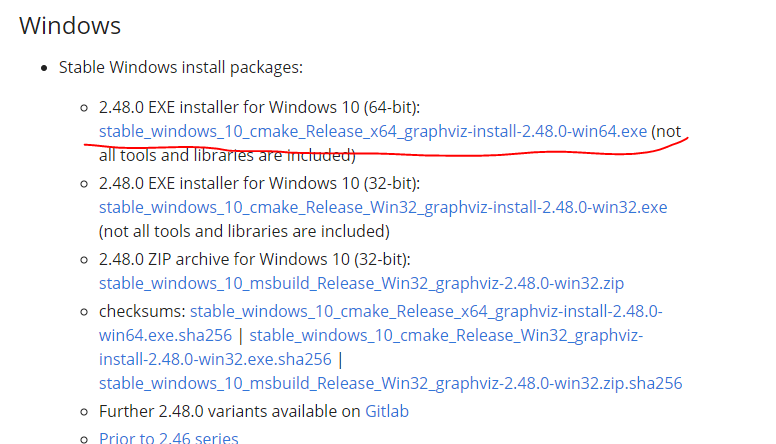

<br>

## 2. 경로추가
-> 만들어진  C:\Program Files\Graphviz\bin 폴더 경로 복사   
-> 내pc 오른쪽 버튼 -> 속성 -> 고급시스템설정 -> 환경변수 -> acorn에대한 사용자변수 -> Path 누름 -> 편집 -> 새로만들기 -> 경로 붙여넣기


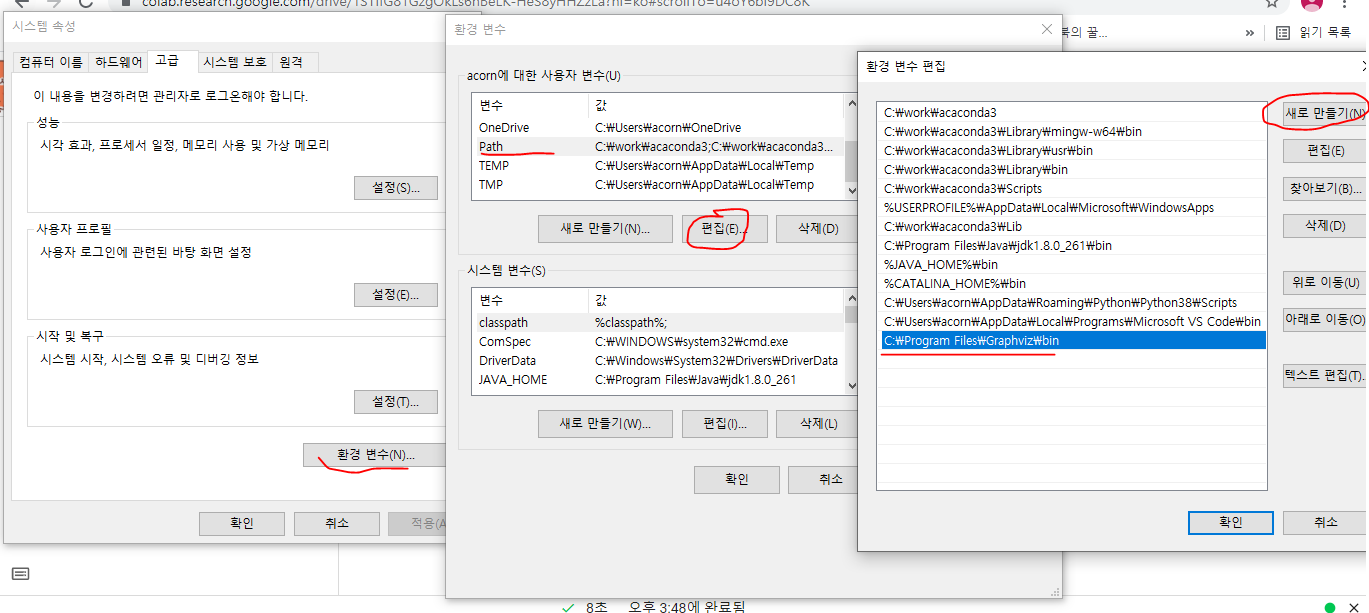

<br>

## 3. anaconda prompt

> pip install pydotplus  
> pip install graphviz

설치 후 이클립스 껐다 키기  

아나콘다 -> Lib -> site-packages에 graphviz 폴더 잘 생성되어 있으면 성공 

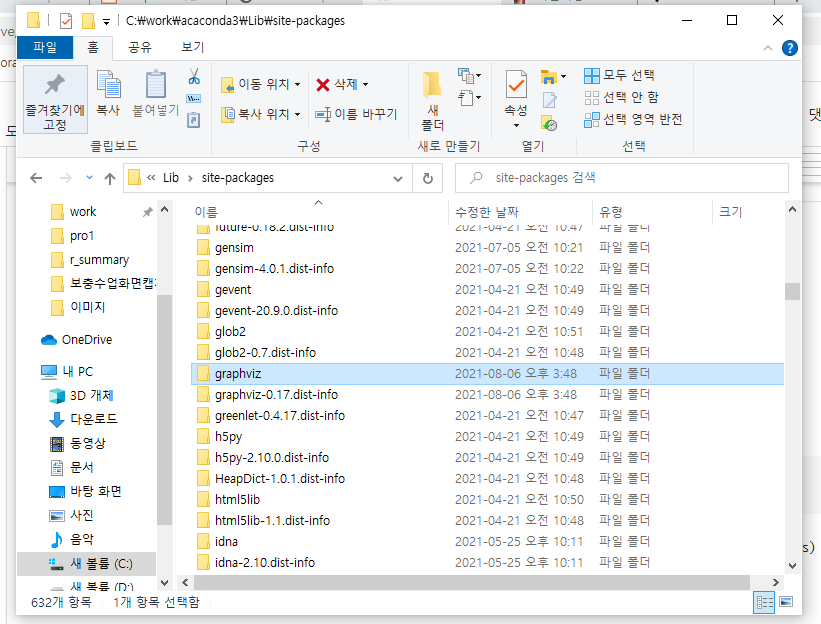

<br>


In [ ]:
!pip install pydotplus
!pip install graphviz

<br>

# 👉 Decision Tree로 키와 머리 길이에 따라 성별 분류하기   




<br>

## 의사결정나무 모델 작성 : **`DecisionTreeClassifier()`**

In [ ]:
import pydotplus
import collections
from sklearn import tree

x = [[180,15],[177,42],[156,35],[174,5],[166,33]]
y = ['man','woman','woman','man','woman']  #dummy처리해도 괜찮고 그냥 문자열 범주로 진행해도 괜찮다. 
label_names = ['height','hair']

#모델 작성
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)  
print(model)

model.fit(x, y)
pred = model.predict(x)
print(pred)
print('분류정확도: {:.3f}'.format(model.score(x, y)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
['man' 'woman' 'woman' 'man' 'woman']
분류정확도: 1.000



나눌 여지가 클수록 엔트로피(불순물도) 높고, 나눌 여지가 작아질수록 엔트로피도 낮아진다. 엔트로피가 0에 최대한 가까워질 때가지 나눈다.  
엔트로피를 줄이려면 `depth` 값을 조정한다.  

<br>

## 시각화 - 나무그림 Tree Graph 


defaultdict(<class 'list'>, {'0': [1, 2]})


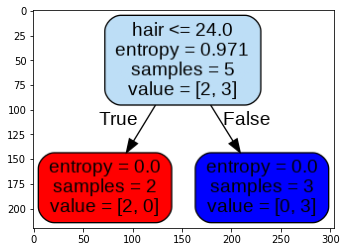

In [ ]:
dot_data = tree.export_graphviz(model, out_file = None, feature_names = label_names, rounded = True, filled = True)  
#out_file=None: 파일생성 X, rounded=True: 둥근네모

graph = pydotplus.graph_from_dot_data(dot_data)
colors = ['red','blue']
edges = collections.defaultdict(list)  #list type의 변수를 부여

for e in graph.get_edge_list():
  edges[e.get_source()].append(int(e.get_destination()))

print(edges) #defaultdict(<class 'list'>, {'0': [1, 2]})

for e in edges:
  edges[e].sort()
  for i in range(2):
    dest = graph.get_node(str(edges[e][i]))[0]
    dest.set_fillcolor(colors[i])

#저장
graph.write_png('tree.png')

#이미지 읽기
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
img = imread('tree.png')
plt.imshow(img)
plt.show()

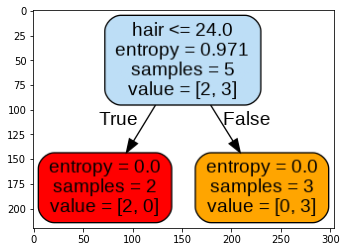

In [ ]:
import collections

dot_data = tree.export_graphviz(model, feature_names=label_names, out_file=None,\
                                filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('red', 'orange')
edges = collections.defaultdict(list) # list type 변수

for e in graph.get_edge_list():
    edges[e.get_source()].append(int(e.get_destination()))

for e in edges:
    edges[e].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[e][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree2.png') # 이미지 저장

import matplotlib.pyplot as plt

img = plt.imread('tree2.png')
plt.imshow(img)
plt.show()

<br>

# 👉 iris dataset으로 의사결정나무 분류하기



In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
print(iris.keys())

#x = iris.data
print(np.corrcoef(iris.data[:,2], iris.data[:,3]))  

x = iris.data[:, [2,3]]  #petal.length, petal.width
y = iris.target
print(x[:3])
print(y[:3], set(y))

#train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[1.         0.96286543]
 [0.96286543 1.        ]]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
[0 0 0] {0, 1, 2}
(105, 2) (45, 2) (105,) (45,)


<br>

## 모델 작성 : `DecisionTreeClassifier()`

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
print(model)
print()

#학습진행
model.fit(x_train, y_train)

#분류 예측
y_pred = model.predict(x_test)
print('예측값:', y_pred)
print('실제값:', y_test)
print('총 개수: %d, 오류수: %d'%(len(y_test), (y_test != y_pred).sum()))
print()

print('분류정확도 확인 1:')
print('%.3f'%accuracy_score(y_test, y_pred))

print('분류정확도 확인 2:')
con_mat = pd.crosstab(y_test, y_pred, rownames=['예측치'], colnames=['관측치'])
#print(con_mat)
print((con_mat[0][0] + con_mat[1][1] + con_mat[2][2])/len(y_test))

print('분류정확도 확인3:')
print('train:', model.score(x_train, y_train))
print('test:', model.score(x_test, y_test))  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

예측값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
실제값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
총 개수: 45, 오류수: 1

분류정확도 확인 1:
0.978
분류정확도 확인 2:
0.9777777777777777
분류정확도 확인3:
train: 0.9809523809523809
test: 0.9777777777777777


<br>

## 시각화 


In [ ]:
#그래프를 위한 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,049 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
findfont: Font family ['NanumBarunGothic'] not

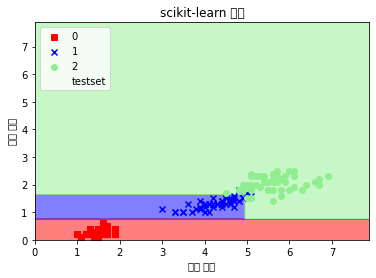

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import font_manager, rc

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02, title=''):
    markers = ('s', 'x', 'o', '^', 'v')  # 점 표시 모양 5개 정의
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #print('cmap : ', cmap.colors[0], cmap.colors[1], cmap.colors[2])

    # decision surface 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # xx, yy를 ravel()를 이용해 1차원 배열로 만든 후 전치행렬로 변환하여 퍼셉트론 분류기의 
    # predict()의 인자로 입력하여 계산된 예측값을 Z로 둔다.
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)   # Z를 reshape()을 이용해 원래 배열 모양으로 복원한다.
    
    # X를 xx, yy가 축인 그래프 상에 cmap을 이용해 등고선을 그림
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    X_test = X[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

    if test_idx:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=[], linewidth=1, marker='o', s=80, label='testset')

    plt.xlabel('꽃잎 길이')
    plt.ylabel('꽃잎 너비')
    plt.legend(loc=2)
    plt.title(title)
    plt.show()

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=x_combined_std, y=y_combined, classifier=model, test_idx=range(105, 150), title='scikit-learn 제공')

<br>

## Tree Graph  




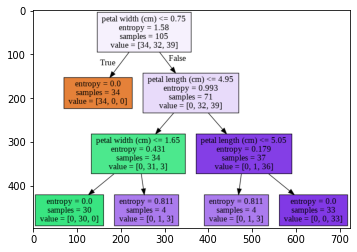

In [ ]:
from sklearn import tree
from io import StringIO
import pydotplus

dot_data = StringIO()  #가상의 파일 흉내
tree.export_graphviz(model, out_file = dot_data, feature_names = iris.feature_names[2:4], filled = True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_iris.png')

from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
img = imread('tree_iris.png')
plt.imshow(img)
plt.show()

<br>

## 특성 중요도 : `feature_importances_` 

전체 트리 결정에 각 특성(feature)이 얼마나 중요한 역할을 하는지 평가하는 특성중요도를 확인할 수 있다. 0~1 사이의 값을 가지며 1에 가까울 수록 중요도가 높음을 의미한다. 0이면 해당 특성은 전혀 사용되지 않았다는 뜻이고 1이면 완벽하게 타겟을 예측했다는 뜻이다. 특성중요도의 전체의 합은 1이다. 

하지만 특성 중요도가 낮다고 그 특성이 유용하지 않다는 뜻은 아니다. 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서 제외되었을 수도 있다.  




특성 중요도: 
 [0.33009479 0.66990521]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_

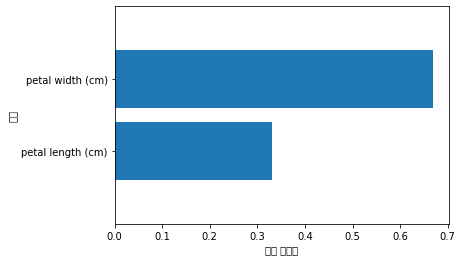

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

print('특성 중요도: \n', model.feature_importances_)

def plot_feature_import(model):
  n_features = x.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), iris.feature_names[2:4])
  plt.xlabel('특성 중요도')
  plt.ylabel('특성')
  plt.ylim(-1, n_features)

plot_feature_import(model)
plt.show()

<br>

# 📛 과적합 방지를 위한 방법들  


분류 모델 수행시에 과적합을 방지를 위한 대표적인 처방들이 있다.  

+ train/test, kfold, GridSearchCV ... 등





In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier  #다른 분류모델을 예로 사용해도 무방하다.
from sklearn.metrics import accuracy_score

iris = load_iris()
print(iris.keys())

#분류모델 생성
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=123)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


<br>

## 아무런 조치없이 모델을 학습했을 때  


In [ ]:
train_data = iris.data
train_label = iris.target
print(train_data[:3])
print(train_label[:3])

#모델 학습
dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)
print('예측값:', pred)
print('실제값:', train_label)
print('분류정확도:', accuracy_score(train_label, pred))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]
예측값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
실제값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
분류정확도: 1.0



분류정확도가 1로 과적합이 발생하였다. 모델이 학습데이터에 지나치게 최적화되어 포용성을 잃었다고 할 수 있다. 새로운 데이터에 대한 추론(분류)이 제대로 이루어지지 않을 수 있다.  

추론통계에서는 모든 환경에서 100% 정확도를 가지면 좋지 않다는 철학을 이해하자.  
ex) 꼬리가 없는 고양이도 고양이로 분류할 수 있는 모델을 필요로 한다.  




<br>

## 방법 1 : train, test로 데이터 나누기  



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 121)
print(len(x_train))
print(len(x_test))

#모델 학습 - train
dt_clf.fit(x_train, y_train)

#모델 검정 - test
pred2 = dt_clf.predict(x_test)
print('예측값:', pred2)
print('실제값:', y_test)
print('분류정확도:', accuracy_score(y_test, pred2))

105
45
예측값: [1 2 1 0 0 1 1 1 1 2 2 1 1 0 0 2 1 0 2 0 2 2 1 1 1 1 0 0 2 2 1 2 0 0 1 2 0
 0 0 2 2 2 2 0 1]
실제값: [1 2 1 0 0 1 1 1 1 2 1 1 1 0 0 2 1 0 2 0 2 2 1 1 1 1 0 0 2 2 1 2 0 0 1 2 0
 0 0 2 2 2 2 0 2]
분류정확도: 0.9555555555555556



분류정확도: 0.9555 로 어느정도 포용성을 만족한다.  





<br>

## 방법 2 : 교차검증 실시 K-Fold 

교차검증 : 데이터의 편중을 방지하고자 학습 시에 train dataset을 분리하여 vaildation으로 검증 작업을 병행하는 방법이다.   
교차검증의 목적은 모델의 성능 평가를 일반화하는 것으로 모델의 성능을 직접적으로 향상시키지는 않는다.  

가장 보편적인 K-Fold 방법을 사용한다.  

+ 데이터 양이 적을 때  
+ train, test로 데이터를 분리한 이후에도 과적합이 발생할 때  



In [ ]:
from sklearn.model_selection import KFold
import numpy as np

features = iris.data
label = iris.target

kfold = KFold(n_splits=5)
cv_acc = []
print('iris shape:', features.shape)  #train이 4/5 (=120), valildation 1/5 (=30) 데이터 양이 적어 train, test로는 분리하지 않음.

n_iter = 0
for train_index, test_index in kfold.split(features):
  #print('n_iter:', n_iter)
  #print('train_index:', train_index)
  #print('test_index(validataion):', test_index)

  xtrain, xtest = features[train_index], features[test_index]
  ytrain, ytest = label[train_index], label[test_index]

  #학습 및 예측
  dt_clf.fit(xtrain, ytrain)
  pred = dt_clf.predict(xtest)

  n_iter += 1

  #정확도
  acc = np.round(accuracy_score(ytest, pred), 3)
  train_size = xtrain.shape[0]
  test_size = xtest.shape[0]
  print('반복수:{}, 교차검증 정확도:{}, 학습데이터 크기:{}, 검증데이터 크기:{}'.format(n_iter, acc, train_size, test_size))
  print('반복수:{}, 검증 데이터 인덱스:{}'.format(n_iter, test_index))
  cv_acc.append(acc)

print('평균 검증 정확도:', np.mean(cv_acc))

iris shape: (150, 4)
반복수:1, 교차검증 정확도:1.0, 학습데이터 크기:120, 검증데이터 크기:30
반복수:1, 검증 데이터 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
반복수:2, 교차검증 정확도:0.967, 학습데이터 크기:120, 검증데이터 크기:30
반복수:2, 검증 데이터 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
반복수:3, 교차검증 정확도:0.9, 학습데이터 크기:120, 검증데이터 크기:30
반복수:3, 검증 데이터 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
반복수:4, 교차검증 정확도:0.933, 학습데이터 크기:120, 검증데이터 크기:30
반복수:4, 검증 데이터 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
반복수:5, 교차검증 정확도:0.8, 학습데이터 크기:120, 검증데이터 크기:30
반복수:5, 검증 데이터 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도: 0.9199999999999999


<br>

## 방법 3 : Stratified KFold

label이 불균형한 분포를 가진 경우 일반 K-Fold를 사용하기 어렵다. (ex 정상대출, 대출사기 -> 대부분이 정상대출이고 일부만 대출사기 label일 경우,  + 스팸메일 등) 


In [ ]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
cv_acc = []
n_iter = 0

for train_index, test_index in kfold.split(features, label):  #label도 함께 입력
  #print('n_iter:', n_iter)
  #print('train_index:', train_index)
  #print('test_index(validataion):', test_index)

  xtrain, xtest = features[train_index], features[test_index]
  ytrain, ytest = label[train_index], label[test_index]

  #학습 및 예측
  dt_clf.fit(xtrain, ytrain)
  pred = dt_clf.predict(xtest)

  n_iter += 1

  #정확도
  acc = np.round(accuracy_score(ytest, pred), 3)
  train_size = xtrain.shape[0]
  test_size = xtest.shape[0]
  print('반복수:{}, 교차검증 정확도:{}, 학습데이터 크기:{}, 검증데이터 크기:{}'.format(n_iter, acc, train_size, test_size))
  #print('반복수:{}, 검증 데이터 인덱스:{}'.format(n_iter, test_index))
  cv_acc.append(acc)

print('교차 검증 정확도:', cv_acc)
print('평균 검증 정확도:', np.mean(cv_acc))

반복수:1, 교차검증 정확도:1.0, 학습데이터 크기:120, 검증데이터 크기:30
반복수:2, 교차검증 정확도:0.967, 학습데이터 크기:120, 검증데이터 크기:30
반복수:3, 교차검증 정확도:0.9, 학습데이터 크기:120, 검증데이터 크기:30
반복수:4, 교차검증 정확도:0.933, 학습데이터 크기:120, 검증데이터 크기:30
반복수:5, 교차검증 정확도:0.8, 학습데이터 크기:120, 검증데이터 크기:30
교차 검증 정확도: [1.0, 0.967, 0.9, 0.933, 0.8]
평균 검증 정확도: 0.9199999999999999


<br>

## 방법 4 : 간편한 함수사용 `cross_val_score()`


In [ ]:
from sklearn.model_selection import cross_val_score

data = iris.data
label = iris.target

score = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=5)
print('교차 검증 정확도:', score)
print('평균 검증 정확도:', np.mean(score))

교차 검증 정확도: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
평균 검증 정확도: 0.9533333333333334


<br>

## 방법 5 : GridSearchCV  

분류, 예측 모델의 최적의 파라미터를 찾아주는 것  

In [ ]:
from sklearn.model_selection import GridSearchCV

df_clf = DecisionTreeClassifier(random_state=123)
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, refit=True)  #refit=True: 최적의 값을 찾을 때까지 재학습하라. true가 기본값
grid_dtree.fit(x_train, y_train)  #방법1에서 나눈 데이터 사용
print(grid_dtree.cv_results_)

import pandas as pd
score_df = pd.DataFrame(grid_dtree.cv_results_)
print(score_df)

print('GridSearchCV의 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV의 최적 정확도:', grid_dtree.best_score_)
print()

#최적의 결정트리 
#방법 1
dt_clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
#방법 2
estimator = grid_dtree.best_estimator_
print(estimator)

#예측
pred = estimator.predict(x_test)
print(pred)

#정확도
print('acc:', accuracy_score(y_test, pred))

{'mean_fit_time': array([0.00057254, 0.00039678, 0.00039186, 0.00039506, 0.00042415,
       0.00039649]), 'std_fit_time': array([1.65386526e-04, 2.28585608e-05, 1.60649545e-05, 3.73031754e-06,
       1.66531580e-05, 1.22881593e-05]), 'mean_score_time': array([0.00038843, 0.00032654, 0.00029244, 0.00028038, 0.00028253,
       0.00029626]), 'std_score_time': array([1.22901982e-04, 4.11095028e-05, 1.82240400e-05, 5.53624164e-06,
       1.43693436e-05, 1.42562349e-05]), 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 1, 'min_samples_split': 2}, {'max_depth': 1, 'min_samples_split': 3}, {'max_depth': 2, 'min_samples_split': 2}, {'max_depth': 2, 'min_samples_split': 3}, {'ma

<br>

references:  
https://circle-square.tistory.com/m/98?category=1008679   
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree  
https://sanghyu.tistory.com/8  
https://rk1993.tistory.com/entry/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0  